## Mean Shift Algorithm

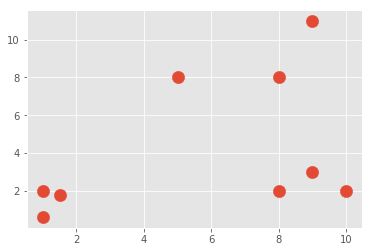

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

X = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11], [8, 2], [10, 2], [9, 3]])
plt.scatter(X[:, 0], X[:, 1], s=150)
plt.show()

In [3]:
colors = 10 * ["g", "r", "c", "b", "k", "m"]

In [5]:
class MeanShift:
    def __init__(self, radius=4):
        self.radius = radius
        
    def fit(self, data):
        centroids = {}
        for i in range(len(data)):
            centroids[i] = data[i];
        
        while True:
            new_centroids = []
            for i in centroids:
                # to be populated with all of the featuresets that are within our radius of consideration
                in_bandwidth = []
                centroid = centroids[i]
                for featureset in data:
                    if np.linalg.norm(featureset - centroid) < self.radius:
                        in_bandwidth.append(featureset)
                        
                    new_centroid = np.average(in_bandwidth, axis=0)
                    new_centroids.append(tuple(new_centroid))
                    
            uniques = sorted(list(set(new_centroids)))
                
            prev_centroids = dict(centroids)
            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])
                    
            optimized = True
            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                if not optimized:
                    break
                
            if optimized:
                break
        
        self.centroids = centroids
    
    def predict(self, data):
        pass
    
clf = MeanShift()
clf.fit(X)
centroids = clf.centroids

plt.scatter(X[:, 0], X[:, 1], s=150)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*', s=150)
    
plt.show()

C:\Users\Aman Deep Singh\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Aman Deep Singh\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


TypeError: 'numpy.float64' object is not iterable